# Zeitdiskrete Systeme im Frequenzbereich

In diesem Notebook wird gezeigt, wie man einfache zeitdiskrete Filter im Frequenzbereich charakterisieren kann.

In [1]:
from __future__ import print_function, division
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
    
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import Image, display
import numpy as np
import scipy.signal as sig

import dsp_fpga_lib as dsp
dsp.versions()
plt.rcParams.update(dsp.mpl_rc) # define plot properties 
# plt.rcParams.update({'axes.grid':False}) # 

Python version: 3.6.4
Numpy: 1.13.3
Scipy: 0.19.1
Matplotlib: 2.1.2 module://ipykernel.pylab.backend_inline


## Zwei LTI-Systeme (nochmal)

Die folgenden Bilden zeigen nochmal die Systeme aus dem vorigen Kapitel.

![ueb-LTI-MA.png](../_img/ueb-LTI-MA.png)


![ueb-LTI-kask_MA.png](../_img/ueb-LTI-kask_MA.png)

Sind die Betragsgänge beider Filter identisch? Wir werden das im Folgenden ausprobieren. Zunächst zeigen wir noch einmal das Verhalten des Systems im Zeitbereich:

### Definition des Filters über seine Koeffizienten
In der nächsten Codezelle definieren wir das Filter über seine Koeffizienten. Bei FIR-Filtern sind die Koeffizienten identisch zur Impulsantwort (warum?):

In [5]:
b = np.ones(4); a = 1 # MA-filter, N = 5
b = np.convolve([1,1,1],[1,1,1]); a = 1 
# b = [1, 0]; a = [1, -0.9] # lossy integrator

## Impulsantwort des Filters
Wenn das Filter ein IIR System ist (z.B. der Lossy Integrator), kann die Impulsantwort nicht mehr direkt aus den Koeffizienten abgelesen werden. Hier wird die Funktion `impz(b,a,N) ` aus der `dsp_fpga_lib` verwendet. `N` ist ein optionaler Parameter, der die Anzahl der darzustellenden Impulse angibt.

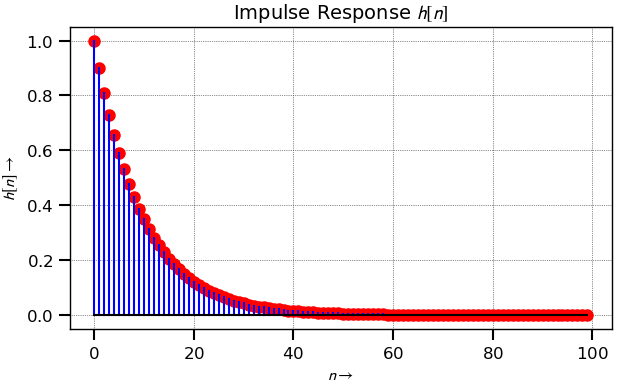

In [7]:
plt.figure()
h, n = dsp.impz(b,a) # calculate impulse response from coefficients
plt.stem(n, h, 'b-', 'ro', 'k') # plot h[n]
plt.xlabel(r'$n \rightarrow$'); plt.ylabel(r'$h[n] \rightarrow$');
plt.title(r'Impulse Response $h[n]$');

## Zeitdiskrete und "analoge Signale"
Auch hier definieren wir ein sinusförmiges Testsignal $x[n]$ mit Gleichanteil.

In [9]:
Ts = 1/200.0     # sampling period
fsig = 50.0      # signal frequency
phi0  = 0        # signal initial phase
tstep = 1e-3     # time step for "analog" signal
Tmax = 6.0/fsig  # timespan for 6 signal periods 
N_Ts = Tmax / Ts # number of samples in Tmax
# -- Calculate time-vectors and input signals ---
t = np.arange(0,Tmax,tstep)  # time t
n = np.arange(0,round(N_Ts)) # sample n (start,stop,step)
xt = 1.5 + 0.5*np.cos(2.0*np.pi*fsig*t + phi0) # x(t).
xn = 1.5 + 0.5*np.cos(2.0*np.pi*fsig*n*Ts + phi0) # x[n]

## Gefiltertes Signal im Zeitbereich
Auch hier falten wir das Testsignal $x[n]$ mit der Impulsantwort des Filters $h[n]$, um das Ausgangssignal $y[n]$ zu erhalten:

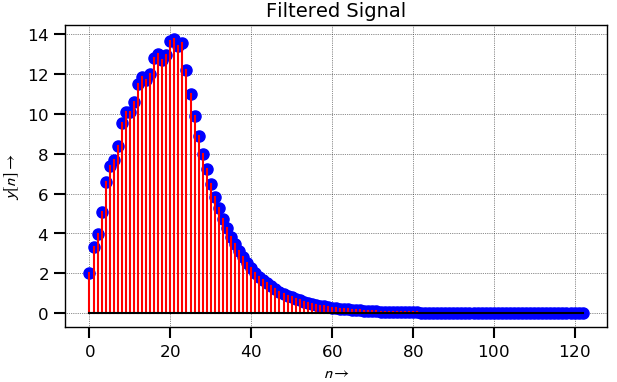

In [13]:
plt.figure()
yn = np.convolve(xn,h) # convolve signal and response
plt.stem(range(len(yn)), yn, 'r-', 'bo', 'k') # y[n]
plt.xlabel(r'$n \rightarrow$'); plt.ylabel(r'$y[n] \rightarrow$')
plt.title('Filtered Signal');

## Pol- und Nullstellendiagramm
Zunächst stellen wir das Pol-/Nullstellendiagramm des Filter dar:

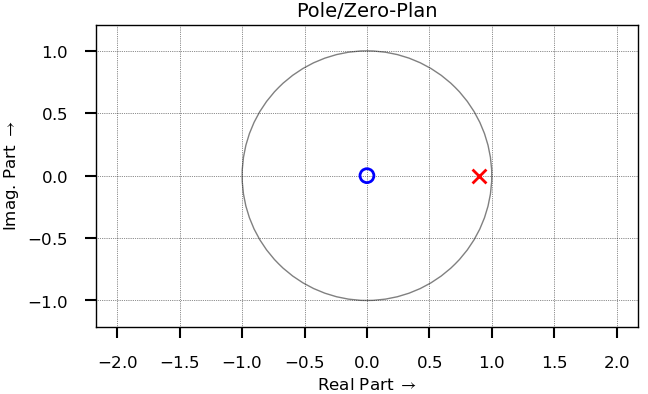

In [14]:
plt.figure()
plt.xlabel(r'Real Part $\rightarrow$'); plt.ylabel(r'Imag. Part $\rightarrow$')
plt.title('Pole/Zero-Plan')
dsp.zplane(b,a);

## Betragsfrequenzgang
Als nächstes schauen wir uns den Betragsfrequenzgang an:

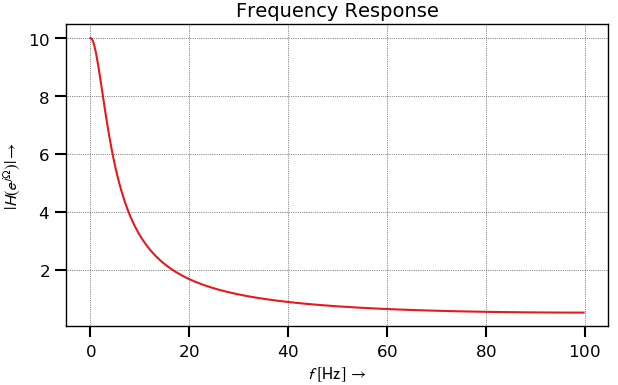

In [21]:
plt.figure()
[W, H] = sig.freqz(b, a, whole=0);
f = W  / (Ts * 2 * np.pi)
plt.plot(f,abs(H))
plt.ylabel(r'$|H(e^{j \Omega})| \rightarrow$')
plt.xlabel(r'$f \; \mathrm{ [Hz]} \, \rightarrow$')
plt.title('Frequency Response');

**Aufgaben:**
- Experimentieren Sie mit verschiedenen Längen für das MA-Filter, interpretieren Sie die Ergebnisse. Was passiert beim MA-Filter der Ordnung $N=3$?
- Lesen Sie die Unterdrückung des Gleichsignals aus den Betragsgang ab. Korrigieren Sie ggf. den Skalierungsfehler für DC-Signale im Code.

<hr>
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.